# A Gentle Introduction to Machine Learning

*In this IPython notebook you will apply a simple Machine Learning algorithm. You will train and evaluate a classifier, using scikit-learn. We will use the Iris flower dataset, introduced in 1936 by Sir Ronald Fisher. The natural task to solve using this dataset is to classify the Iris species knowing the sepal and petal measures.*

*The showcase (analysis part - see chapter 3) is large taken from the book "Machine Learning in Python with Scikit" written by Raúl Garreta & Guillermo Moncecchi. The code is adapted for Python 3.4 and the usage of pandas.*

Start by importing numpy, pandas, scikit-learn, and matplotlib, the Python libraries we will be using in this chapter. 
Show the versions we will be using (in case you have problems running the notebooks). Also enable plotting in the notebook.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline         

numpy version: 1.9.2
pandas version: 0.16.2
scikit-learn version: 0.16.1
matplotlib version: 1.4.3


## 1 - Load Iris dataset

The first thing you have to do is load the Iris dataset in this notebook. Use the dataset provided in Sharepoint and try to include it as a dataframe object.

In [2]:
df_iris = pd.read_csv("data/ML04_iris.csv")

Show the first 5 rows (a.k.a. observations) and the last 10 rows of the Iris dataset. You can use the dataframe ``head`` and ``tail`` method for this. Also have a look at a row somewhere in the middle.

In [3]:
df_iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df_iris.loc[75]         # iloc[75] will do as well in this case
df_iris.tail(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Describe the Iris flower dataset in short (use the Internet to find information). What is the size of the dataset? How many features are their? What are these features? How many flower species are present in this dataset? Can this dataset by put straightforward into a machine learning algorithm? Explain. What has to be changed before using the scikit-learn?

In [4]:
df_iris.shape

(150, 5)

The Iris flower dataset includes information about 150 instances from three different Iris flower species, including sepal and petal length and width (i.e. 4 features). These measures are in cm. 
It can not be put into scikit-learn methods because the species name, which is the target class, is not numerical.

## 2 - Prepare Iris Dataset

Add a column **Label** to your dataframe with 0 for *Iris setosa*, 1 for *Iris versicolor*, and 2 for *Iris virginica*.

In [5]:
df_iris['Label'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
df_iris

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In order to get some feeling for the data make a boxplot (with 4 subplots, i.e. for each of the features) of an Iris species.
1. Can you predict the Iris species accurately from any feature alone? Try the other features as well.
2. Which features are the most discriminative? Also review the scatter matrix plot that you created in the data visualistion lesson of week 3.
3. Comment on this; which features have a strong correlation? What does this mean?

Note: In descriptive statistics, a [boxplot](https://en.wikipedia.org/wiki/Box_plot) is a convenient way of graphically depicting groups of numerical data through their quartiles. Boxplots may also have lines (whiskers) extending vertically from the boxes indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. 

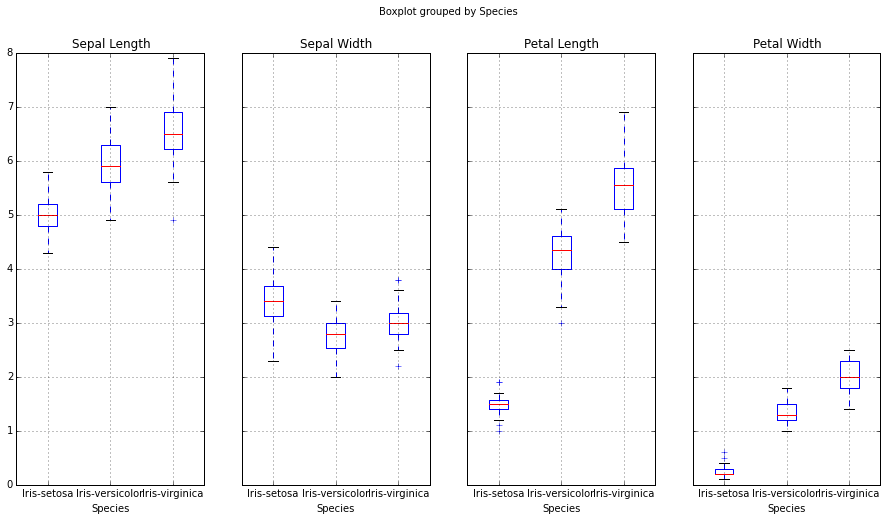

In [17]:
features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=features, by='Species', figsize=(15,8), layout=(1,4));       # cooooool!

## 3 - Showcase Analysis

Our first step will be to separate the dataset into to separate sets, using 75% of the instances for training our classifier, and the remaining 25% for evaluating it. In this case, we take only two features, sepal length and width. We will also perform feature scaling: for each feature, calculate the average, subtract the mean value from the feature value, and divide the result by their standard deviation. After scaling, each feature will have a zero average, with a standard deviation of one. This standardization of values (which does not change their distribution, as you could verify by plotting the X values before and after scaling) is a common requirement of machine learning methods, to avoid that features with large values may weight too much on the final results.

### 3.1 - Split in Train and Test Set

In [24]:
from sklearn.cross_validation import train_test_split

# Get from the dataframe only the first two features, it is common practice to call this X (the independent variables)
X = df_iris[['Sepal Length','Sepal Width']] 

# Get from the dataframe the just created label variable, usually called y (the target class that you want to predict)
y = df_iris['Label']

# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


pandas.core.series.Series

### 3.2 - Normalize

In [30]:
from sklearn.preprocessing import StandardScaler

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5,:]

array([[-0.91090798, -1.59761476],
       [-1.0271058 ,  0.09442168],
       [ 0.59966379, -1.59761476],
       [ 0.01867465, -0.9631011 ],
       [ 0.48346596, -0.32858743]])

Let's plot the training data. But notice that X_train has become a NumPy array after transformation. This means we've lost the column names. y_train, however, is stil a pandas series. Because we can't use a pandas series as a Boolean mask for a NumPy array, we have to extract the NumPy array from the pandas Series. We use `pandas.Series.as_matrix()` to convert a Series to a NumPy array

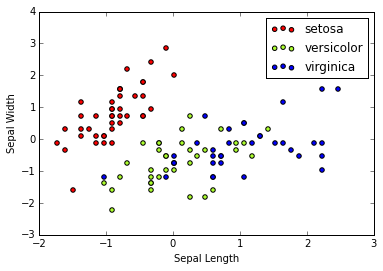

In [31]:
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])   # maintain order from dataset preparation!
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1]);

### 3.3 - Compute Decision Boundaries on Train Set

Note that setosa is easily separable from the other two classes, while versicolor and virginica are pretty messed ... 

To implement linear classification, we will use the SGDClassifier from scikit-learn. SGD stands for Stochastic Gradient Descent, a popular numerical procedure to find the local minimum of a function (in this case, the loss function, which measures how far every instance is from our boundary). The algorithm will learn the coefficients of the hyperplane by minimizing the loss function. In precise in-and-outs of this method is beyond the scope of this lesson, click [here](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) for more information.

Let's fit this linear classification method to our training data, and show the computed hyperplanes (a.k.a. decision boundaries):

In [32]:
# Create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# Fit (=train) the classifier
clf.fit(X_train, y_train)

# Print the 'learned' coeficients
print(clf.coef_)
print(clf.intercept_)

[[-34.52501222  12.3553701 ]
 [ -3.84646435 -12.8156682 ]
 [  7.33357044   0.75101269]]
[-18.09035004  -9.03261751 -10.48914232]


Every future classification decision depends just on a hyperplane. That hyperplane is, then, our model. The `coef_ attribute` of the `clf` object (consider, for the moment, only the first row of the matrices), now has the coefficients of the linear boundary and the `intercept_` attribute, the point of intersection of the line with the
y axis. 

With these three values, we can draw a line, represented by the following equation:

    -17.77995558 - 27.81699134*x1 + 19.13871055*x2 = 0

Now, given `x1` and `x2` (the real-valued features, in our case sepal length and width), we just have to compute the value of the left-side of the equation: if its value is greater than zero, then the point is above the decision boundary (the red side), otherwise it will be beneath the line (the green or blue side). Our prediction algorithm will simply check this and predict the corresponding class for any new iris flower.

#### Question
What do they other rows of the matrix (and other `intercept_` values) represent? Explain in your own words!

Plot the three calculated decision curves. 

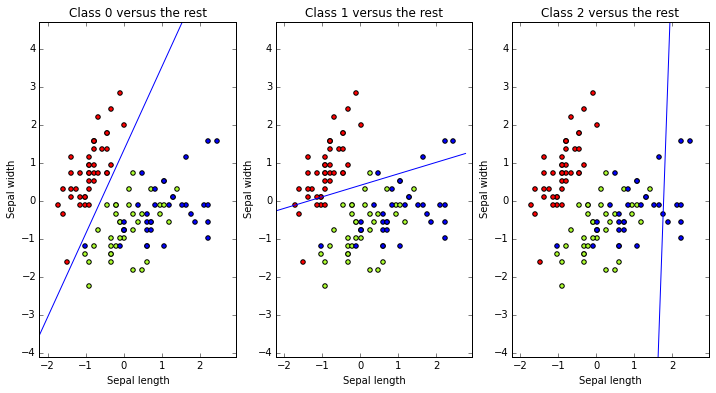

In [14]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)

fig, axes = plt.subplots(1, 3, sharex=True)
fig.set_size_inches(12,6)

for i in [0,1,2]:     # for each single class against two other classes
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_aspect('equal')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    for j in range(len(colors)):
        px = X_train[:, 0][y_train.as_matrix() == j]
        py = X_train[:, 1][y_train.as_matrix() == j]
        axes[i].scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
    axes[i].plot(xs,ys)

Note that target class labeled 0 is linearly separable, while class 1 and class 2 are not!!

### 3.4 - Evaluate Performance

Now, the end of the story: suppose that we have a new flower with a sepal width of 4.7 and a sepal length of 3.1, and we want to predict its class. We just have to apply our brand new classifier to it (after normalizing!). The predict method takes an array of instances (in this case, with just one element) and returns a list of predicted classes:

If our classifier is right, this Iris flower is a setosa.

In [15]:
print(clf.predict(scaler.transform([[4.7, 3.1]]))[0])

0


Try some other values for yourself. Does the prediction make sense?

OK, that works fine. Now let's see how good our classifier is on our test set.

In [16]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5


#### Question
Why do we use the test set for this? What does accuracy mean?

## 4 - Do It Yourself Analysis

1. What happens if you do the above analysis with another training set? Show and explain.

2. Pick 2 other features (motivate your choice) and repeat the above analysis. Include the plots as well. Show all 4 steps (split train and test set, normalize, compute hyperplane, evaluate the performance with test set). Is the prediction power of these other 2 features better or worse? 

3. Can you also do this analysis with 3 or 4 features? Does the accuracy improve?

Optional: 
1. Leave out the normalization step and adapt your code accordingly. Does the accuracy change without normalization. Can you eplain why.
2. Can you execute the same analysis when importing the Iris data set from sklearn.datasets:  
`from sklearn.datasets import load_iris`


##atributes of choice: Sepal length and width

i tought it would be interesting to see if there was a difference between the Petal features and the rest.
The data made allot more sense afterwards.

I think using the data with all 4 attributes would not increase accuracy, it would instead make the data more cluttered (according to human eyes :) )

In [6]:
#setting up
from sklearn.cross_validation import train_test_split

# Get from the dataframe only the first two features, it is common practice to call this X (the independent variables)
X = df_iris[['Petal Length','Petal Width']] 

# Get from the dataframe the just created label variable, usually called y (the target class that you want to predict)
y = df_iris['Label']

# Split the dataset into a training and a testing set; test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


In [7]:
#normalization

from sklearn.preprocessing import StandardScaler

# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5,:]

array([[-0.15438202, -0.14641523],
       [-1.15513491, -1.35614105],
       [ 0.45718919,  0.25682671],
       [ 0.23479966,  0.12241273],
       [ 0.40159181,  0.25682671]])

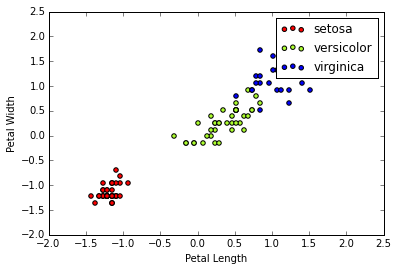

In [11]:
#plotting normalized data for visabillity
colors = ('red', 'greenyellow', 'blue')
for i in range(len(colors)):
    x1s = X_train[:, 0][y_train.as_matrix() == i]
    x2s = X_train[:, 1][y_train.as_matrix() == i]
    plt.scatter(x1s, x2s, c=colors[i])

plt.legend(['setosa', 'versicolor', 'virginica'])   # maintain order from dataset preparation!
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1]);

In [12]:
#checking the train set

# Create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# Fit (=train) the classifier
clf.fit(X_train, y_train)

# Print the 'learned' coeficients
print(clf.coef_)
print(clf.intercept_)

[[ -8.99515526  -6.82046562]
 [ 17.1974632  -16.45841478]
 [ 19.9294431   21.93942101]]
[-10.           4.35595685 -43.55846964]


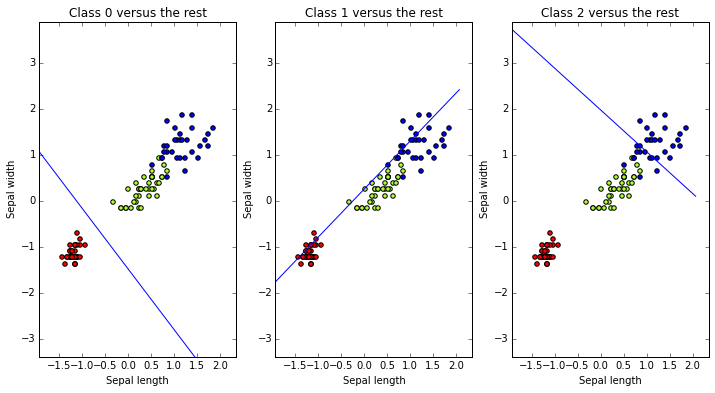

In [13]:
#plotting the differences

x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.5)

fig, axes = plt.subplots(1, 3, sharex=True)
fig.set_size_inches(12,6)

for i in [0,1,2]:     # for each single class against two other classes
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_aspect('equal')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    for j in range(len(colors)):
        px = X_train[:, 0][y_train.as_matrix() == j]
        py = X_train[:, 1][y_train.as_matrix() == j]
        axes[i].scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i] - xs * clf.coef_[i,0]) / clf.coef_[i,1]
    axes[i].plot(xs,ys)